In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
%matplotlib inline


In [3]:
# Load the data
dfu = pd.read_csv('d:/Ukesh/Coding Shinobi/Codealpha_tasks/Task 2/Unemployment in India.csv')


In [4]:
dfu.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
dfu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
dfu.shape


(768, 7)

In [7]:
dfu.describe()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [8]:
import warnings
warnings.simplefilter('ignore')
print("Sucessfully Suppressed Warnings")


Sucessfully Suppressed Warnings


In [9]:
dfu.isnull().sum()


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [10]:
dfu.columns = dfu.columns.str.strip()


In [11]:
# Display Columns name
print("Columns Names \n")
for i in dfu.columns:
    print(i)    


Columns Names 

Region
Date
Frequency
Estimated Unemployment Rate (%)
Estimated Employed
Estimated Labour Participation Rate (%)
Area


In [12]:
# Rename the columns
dfu.rename(columns={'Estimated Unemployment Rate (%)' : 'Unemployment_Rate','Estimated Employed' : 'Employed','Estimated Labour Participation Rate (%)' : 'Labour_Participation_Rate'}, inplace=True)

# Display Columns name
print("Columns Names \n")
print(dfu.columns)


Columns Names 

Index(['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labour_Participation_Rate', 'Area'],
      dtype='object')


In [13]:
dfu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Region                     740 non-null    object 
 1   Date                       740 non-null    object 
 2   Frequency                  740 non-null    object 
 3   Unemployment_Rate          740 non-null    float64
 4   Employed                   740 non-null    float64
 5   Labour_Participation_Rate  740 non-null    float64
 6   Area                       740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [14]:
# setting display format of floating point numbers
pd.options.display.float_format = '{:.2f}'.format

# Display the data and describe the data
dfu.describe()



,Unemployment_Rate,Employed,Labour_Participation_Rate
count,740.00,740.00,740.00
mean,11.79,7204460.03,42.63
std,10.72,8087988.43,8.11
min,0.00,49420.00,13.33
25%,4.66,1190404.50,38.06
50%,8.35,4744178.50,41.16
75%,15.89,11275489.50,45.51
max,76.74,45777509.00,72.57


In [15]:
# Handling Missing Values

# Check for missing values
missing_values = dfu.isnull().sum()

# Find the percentage of missing values in each column
missing_percentage = (missing_values /
                      len(dfu)) * 100  

# display the missing values and their percentage
print('missing values\n')
print(missing_values, '\n\n')

print('percentage of missing values\n')
print(missing_percentage.apply(lambda x: f'{x:.0f}%'))




missing values

Region                       28
Date                         28
Frequency                    28
Unemployment_Rate            28
Employed                     28
Labour_Participation_Rate    28
Area                         28
dtype: int64 


percentage of missing values

Region                       4%
Date                         4%
Frequency                    4%
Unemployment_Rate            4%
Employed                     4%
Labour_Participation_Rate    4%
Area                         4%
dtype: object


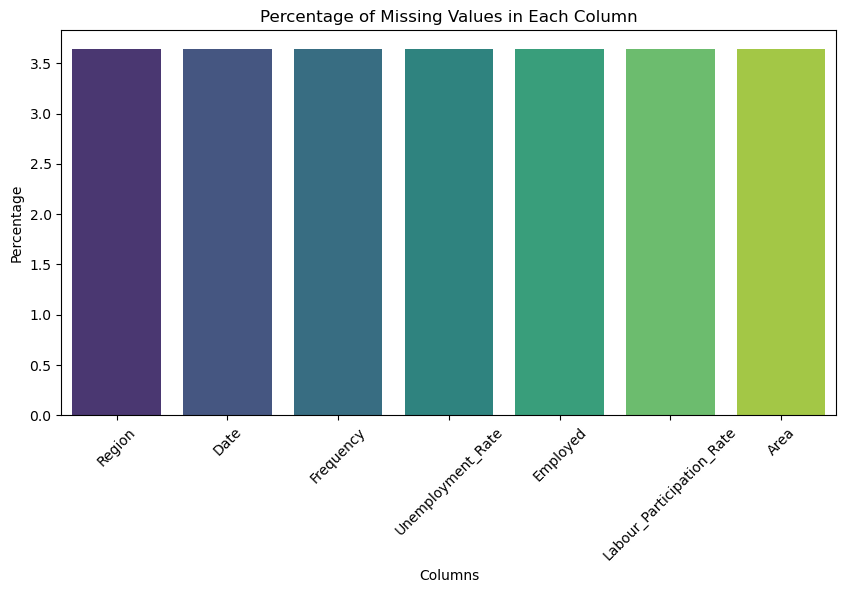

In [16]:
# Plot the missing values with percentage in a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=dfu.columns, y=missing_percentage, palette='viridis')
plt.title('Percentage of Missing Values in Each Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()




In [17]:
# Fill the missing values with the mean of the column
dfu['Unemployment_Rate'].fillna(dfu['Unemployment_Rate'].mean(), inplace=True)
dfu['Employed'].fillna(dfu['Employed'].mean(), inplace=True)
dfu['Labour_Participation_Rate'].fillna(dfu['Labour_Participation_Rate'].mean(), inplace=True)

# Fill missing values with mode for categorical columns
dfu['Region'].fillna(dfu['Region'].mode()[0], inplace=True)
dfu['Date'].fillna(dfu['Date'].mode()[0], inplace=True)
dfu['Frequency'].fillna(dfu['Frequency'].mode()[0], inplace=True)
dfu['Area'].fillna(dfu['Area'].mode()[0], inplace=True)

# Display the values 
print('Missing values after filling\n')
print('Missing Data is less than 5% so we can impute the missing values')

dfu.isnull().sum()


Missing values after filling

Missing Data is less than 5% so we can impute the missing values


Region                       0
Date                         0
Frequency                    0
Unemployment_Rate            0
Employed                     0
Labour_Participation_Rate    0
Area                         0
dtype: int64

In [18]:
# rechecking missing values after imputation 
dfu.isna().sum()


Region                       0
Date                         0
Frequency                    0
Unemployment_Rate            0
Employed                     0
Labour_Participation_Rate    0
Area                         0
dtype: int64

In [19]:
# Duplicate Rows

# Check for duplicate rows
print(f'Rows before dropping duplicate : {dfu.shape[0]}')
print(f'Duplicate Rows : {dfu.duplicated().sum()}')


Rows before dropping duplicate : 768
Duplicate Rows : 27


In [20]:
# Display the duplicate rows
duplicate_rows = dfu[dfu.duplicated()].head(10)
duplicate_rows


,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area
360,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban
361,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban
362,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban
363,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban
364,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban
365,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban
366,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban
367,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban
368,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban
369,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban


In [21]:
# Drop the duplicate rows
dfu.drop_duplicates(inplace=True)

print('Duplicate rows dropped \n')
print(f'Rows after dropping duplicate : {dfu.shape[0]}')


Duplicate rows dropped 

Rows after dropping duplicate : 741


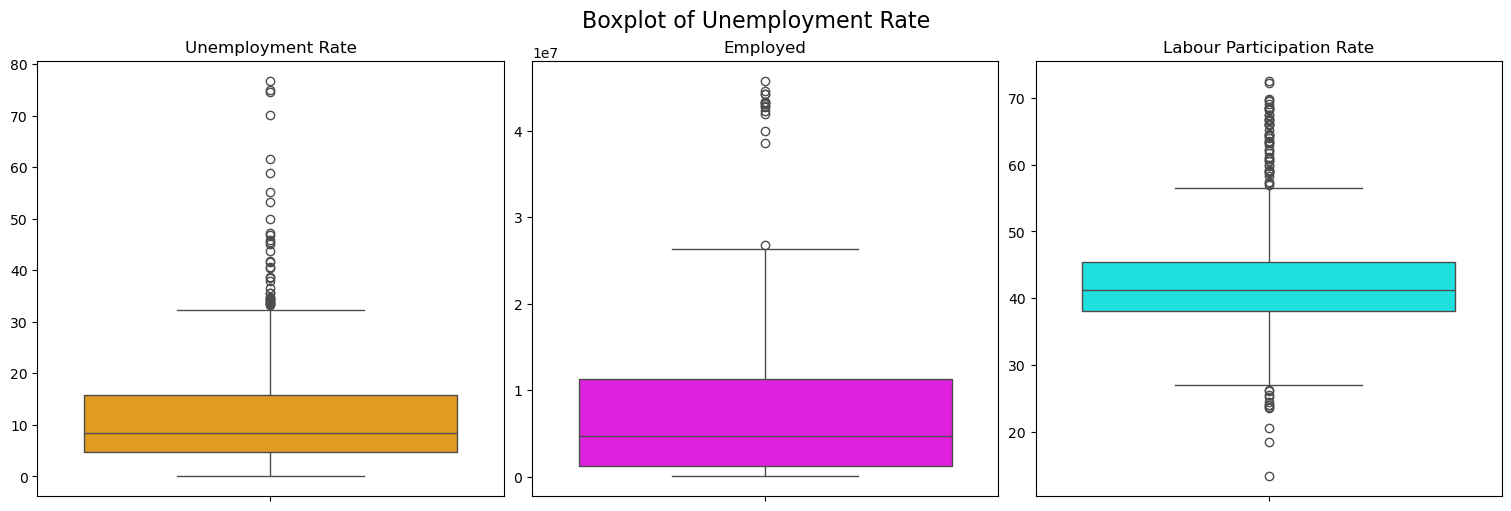

In [22]:
# Outliers

# Set up the figure with row and columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

# Creating individual plots
sns.boxplot(ax=axes[0], y=dfu['Unemployment_Rate'], color='orange')
axes[0].set_title('Unemployment Rate')
axes[0].set_ylabel('')

sns.boxplot(ax=axes[1], y=dfu['Employed'], color='magenta')
axes[1].set_title('Employed')
axes[1].set_ylabel('')

sns.boxplot(ax=axes[2], y=dfu['Labour_Participation_Rate'], color='cyan')
axes[2].set_title('Labour Participation Rate')
axes[2].set_ylabel('')

# Common title for all the plots
fig.suptitle('Boxplot of Unemployment Rate', fontsize=16)

# Display the plots
plt.show()
